In [1]:
%pylab inline
from scipy.integrate import odeint

def mysavefig(filename):
    plt.tight_layout()
    plt.savefig("../images/ds3/"+filename, bbox_inches="tight", dpi=600)
    return

Populating the interactive namespace from numpy and matplotlib


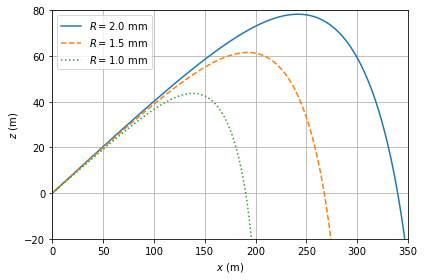

In [42]:
g  = 9.81
v0 = 380
theta0 = 20 * np.pi/ 180
rho_a = 1.23
rho   = 11350
CD    = 0.44

plt.figure(figsize=(6,4))
ax = plt.subplot2grid((1,1), (0,0))

rs = [2e-3,1.5e-3,1e-3]
styles = ("-", "--", ":")
for r,style in zip(rs, styles):
    m = 4/3 * np.pi * r**3 * rho
    rapport = v0 / np.sqrt(2*m*g/rho_a/np.pi/r**2/CD)
    theta0 = np.arctan(np.sqrt(2*np.sqrt(2)*rapport**2/(1+2*np.sqrt(2)*rapport**2)/np.log(1+2*np.sqrt(2)*rapport**2)))
    def plomb(V,t):
        x,dx,z,dz = V
        v = np.sqrt(dx**2+dz**2)
        ddx = -1/2 * rho_a * np.pi * r**2 * CD * v * dx / m
        ddz = -1/2 * rho_a * np.pi * r**2 * CD * v * dz / m - g
        return [dx,ddx,dz,ddz]
    
    t = np.linspace(0,10,1000)
    V = odeint(plomb,[0,v0*np.cos(theta0),0,v0*np.sin(theta0)],t)
    x = V[:,0]
    z = V[:,2]
    ax.plot(x,z, style, label="$R=${:.1f} mm".format(r*1e3))
ax.set_xlim(0,350)
ax.set_ylim(-20,80)
ax.grid()
ax.set_xlabel("$x$ (m)")
ax.set_ylabel("$z$ (m)")
#ax.set_aspect("equal")
ax.legend(loc="best")
mysavefig("simulation.pdf")


In [24]:
np.log10(17)**2

1.5140045481209576